<a href="https://colab.research.google.com/github/harishmuh/machine_learning_practices/blob/main/Car_potential_buyer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercise - Car potential buyer - Logistic regression**

**Context**

A car dealership wants to identify potential buyers from their customer database. Currently, they do not have a systematic way of targeting customers, and promotions are sent randomly. This results in wasted marketing budget and lower conversion rates.

By using Machine Learning (ML), specifically Logistic Regression, the dealership can predict whether a customer is likely to buy a car based on their demographic and financial characteristics.

**Problem Formulation**

* **Problem**: How can we predict whether a customer will buy a car?

* **Features**:

  * ID → identifier (not useful for prediction).

  * Age → numeric predictor.

  * Marital_Status → categorical
    * Single: 0
    * Married: 1
    * Married with children: 2
    * Divorced: 3

  * Gender → categorical
    * Male: 0
    * Female: 1

  * Own_Cars → numeric (number of cars currently owned).

  * Incomeyear_million_IDR → numeric (annual income in millions of IDR).

* **Target**: Will_Buy_Car → binary target (0 = No, 1 = Yes).

* **ML Objective**: Train a supervised ML classification model to predict Will_Buy_Car.

* **Action**: Focus marketing campaigns on customers predicted as potential buyers.

* **Value**: Potentially Increase sales conversion and reduce marketing costs




In [1]:
# Importing libraries

# Data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine learning model
from sklearn.linear_model import LogisticRegression

# Data preprocessing and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import feature_selection

# Settings
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading dataset
car_buyer_csv_url = 'https://raw.githubusercontent.com/harishmuh/machine_learning_practices/refs/heads/main/datasets/calonpembeli.csv'
df = pd.read_csv(car_buyer_csv_url)
df.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


In [3]:
# Rename columns
df = df.rename(columns={'Usia': 'Age', 'Status':'Marital_Status', 'Kelamin':'Gender', 'Memiliki_Mobil':'Own_Cars', 'Penghasilan':'Incomeyear_million_IDR', 'Beli_Mobil':'Will_Buy_Car'})
df.head()

,ID,Age,Marital_Status,Gender,Own_Cars,Incomeyear_million_IDR,Will_Buy_Car
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


In [4]:
# Data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   ID                      1000 non-null   int64
 1   Age                     1000 non-null   int64
 2   Marital_Status          1000 non-null   int64
 3   Gender                  1000 non-null   int64
 4   Own_Cars                1000 non-null   int64
 5   Incomeyear_million_IDR  1000 non-null   int64
 6   Will_Buy_Car            1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [5]:
# Descriptive statistics
df.describe()

,ID,Age,Marital_Status,Gender,Own_Cars,Incomeyear_million_IDR,Will_Buy_Car
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000
mean,500.500000,43.532000,1.469000,0.481000,0.95200,270.09000,0.633000
std,288.819436,12.672078,1.073402,0.499889,0.80146,95.23681,0.482228
min,1.000000,24.000000,0.000000,0.000000,0.00000,95.00000,0.000000
25%,250.750000,33.000000,1.000000,0.000000,0.00000,187.00000,0.000000
50%,500.500000,43.000000,1.000000,0.000000,1.00000,258.50000,1.000000
75%,750.250000,53.000000,2.000000,1.000000,2.00000,352.25000,1.000000
max,1000.000000,164.000000,3.000000,1.000000,4.00000,490.00000,1.000000


In [6]:
# Missing values
df.isna().sum().to_frame('missing_values')

,missing_values
ID,0
Age,0
Marital_Status,0
Gender,0
Own_Cars,0
Incomeyear_million_IDR,0
Will_Buy_Car,0


In [7]:
# Anomaly check
df[df['Age'] == 100]

,ID,Age,Marital_Status,Gender,Own_Cars,Incomeyear_million_IDR,Will_Buy_Car


In [8]:
# Define features and target
X = df.drop('Will_Buy_Car', axis=1)
y = df['Will_Buy_Car']

In [9]:
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
print('X_train :', X_train.shape)
print('X_test :', X_test.shape)
print('y_train :', y_train.shape)
print('y_test :', y_test.shape)

X_train : (800, 6)
X_test : (200, 6)
y_train : (800,)
y_test : (200,)


In [11]:
# Training dataset

# Define model
model = LogisticRegression()

# Fitting to training data
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
# Model coeficient
model.coef_

array([[-1.21514610e-03, -2.12985169e-02, -5.47448241e-02,
        -1.62161156e+00,  6.24336615e-01,  4.29238148e-02]])

In [13]:
# Predict to test dataset
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1])

In [14]:
# Total number of prediction
len(y_pred)

200

We have 200 prediction results. Based on the result, the first prediction result is 0 (Will_Buy_Car = 0).

Now, lets do cross check to confirm. lets check the first line of customer. It turns out the first line is the customer with rows number 993.

In [15]:
# test dataset
X_test.head()

,ID,Age,Marital_Status,Gender,Own_Cars,Incomeyear_million_IDR
993,994,25,2,0,0,208
859,860,26,1,1,0,347
298,299,25,2,0,0,332
553,554,51,2,0,0,429
672,673,55,2,0,0,353


Lets check the with actual result

In [16]:
# Result
y_test.head(1)

,Will_Buy_Car
993,0


**Insight**
* It turns out the prediction provides same result with the actual test data.
* We can also extract some insights from the customer number 993 as below:
> "Customer ID 994 (Age 25, Married without kids, Male, No cars, Annual income 208M IDR) was correctly predicted as Not a car buyer. The combination of young age, married without kids, and his current income suggests lower probability of purchasing a car at this time.

* Based on the insight, We can also suggest that Marketing efforts may be better allocated to older, married with kids or higher-income customers.

**Model Evaluation**

Now we will evaluate the model using confusion matrix

In [17]:
confusionmatrix = confusion_matrix(y_test, y_pred)
confusionmatrix

array([[ 66,   8],
       [  4, 122]])

In [18]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,66,8
1,4,122


Lets check for accuracy

In [19]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.94

The current model provides decent accuracy (about 0.94) on test set. However, we still can further improve this model performance.

The classification report below provides overall model performance.

In [20]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92        74
           1       0.94      0.97      0.95       126

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.94       200



We can also check for another metric like ROC-AUC score. This metric measures how well a classification model separates the classes (e.g., positive vs. negative).
* ROC (Receiver Operating Characteristic curve): shows the trade-off between True Positive Rate (sensitivity) and False Positive Rate (1 - specificity) at different thresholds.

* AUC (Area Under Curve): gives a single number between 0 and 1 summarizing model performance.
  * AUC ≈ 0.5 → model is no better than random guessing.
  * AUC ≈ 1.0 → model perfectly separates classes.

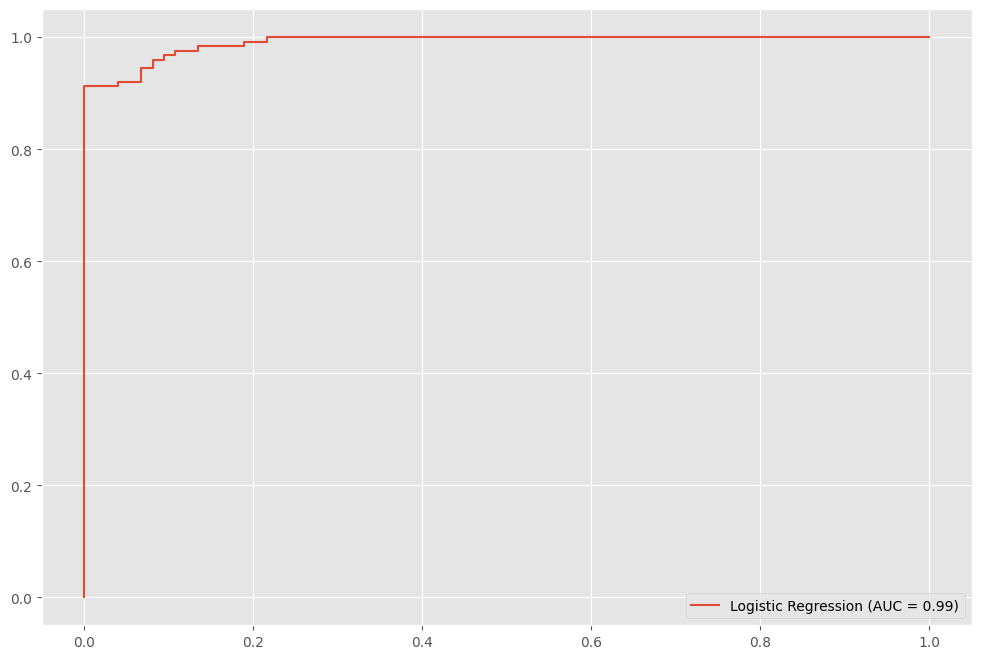

In [21]:
# ROC AUC visualization
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Predict probability of each class
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' %auc)
plt.legend(loc=4)
plt.show()

We get a decent score of AUC that means the model has the ability to discriminate both positive and negative classes.

**Feature selection**

Which ones are the best feature for the prediction? We will use recursive feature elimination (RFE) to find the best feature for the model.

In [22]:
rfe = feature_selection.RFE(model, step=3)
rfe = rfe.fit(X_train, y_train)
print('Support =', rfe.support_)
print('Ranking =', rfe.ranking_)

Support = [False False  True  True  True False]
Ranking = [2 2 1 1 1 2]


The most important features are the features that gets number 1 rank which are 'Marital_Status', 'Gender', and 'Own_Cars'